In [158]:
import pandas as pd
import re
from bs4 import BeautifulSoup

In [159]:
def read(filename):
    data = pd.read_csv(filename)
    t = data.drop_duplicates(['description'], keep='last')
    return t 

In [160]:
def cleanhtml(raw_html):
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', raw_html)
    cleantext = BeautifulSoup(text, "lxml").text
    clean= BeautifulSoup(cleantext, "html.parser").text
    clean = clean.replace('\xa0',' ') 
    return clean


In [161]:
def clean(doc):
    meetup_words = ['<p>','<\p>','<br>','group', 'join','meetup','right','idea','join','community','make','social','discuss',
                    'people','country','topic','human','justice','discus','important']
    for meetup_words in meetup_words:
        doc = doc.replace(meetup_words, '')
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    return normalized

In [162]:
def run_cleahtml(t,class_no):
    col_names =  [ 'name','class','description']
    my_df  = pd.DataFrame(columns = col_names)
    clean = []
    for index, row in t.iterrows():
        try:
            text = row['description'] 
            my_df.loc[index] = cleanhtml(text)
            #my_df.loc[index] = row['name']
            #my_df.loc[index] = class_no
            clean.append(cleanhtml(text))
        except TypeError:
            print('error')
            continue
    my_df['name'] = t.name.values
    my_df['class'] = class_no
    return my_df


In [221]:
files =[[0,'env_94104.csv'],[1,'women_94104.csv'], [1,'politics_94104.csv'],[2,'support_groups_94104.csv']]
col_names =  [ 'name','class','description']
data  = pd.DataFrame(columns = col_names)
class_no = 0
for f in files:
    file = f[1]
    t  = read(file)
    t.reset_index(drop=True, inplace=True)
    if (file == 'women_94104.csv') or (file == 'politics_94104.csv'):
        t = t[:400]
    class_no = f[0]  #print(class_no)
    my_df = run_cleahtml(t,class_no)
    my_df.to_csv(str('new') +file ,encoding= 'utf-8',index=False)
    data = data.append(my_df, ignore_index=True)
    

In [222]:
data.to_csv('group_data.csv',encoding= 'utf-8',index=False)

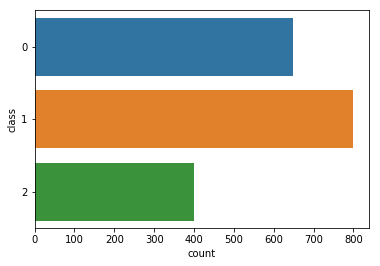

In [223]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.countplot(y="class",data=data)
plt.show()

In [220]:
def cleanhtml(raw_html):
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', raw_html)
    cleantext = BeautifulSoup(text, "lxml").text
    clean= BeautifulSoup(cleantext, "html.parser").text
    clean = clean.replace('\xa0',' ') 
    clean = clean.replace('\r\n\r\n\n',' ') 
    return clean

In [224]:
def clean_user_data(data):
    text = data['text'].tolist()
    cl_text = []
    for t in text:
        cl_text.append(cleanhtml(t))
    return cl_text

In [241]:
user_data = pd.read_csv('enerknol_tweets.csv')
user_data['text'] = clean_user_data(user_data[['text']])

In [242]:
user_data.head()

,text
0,"Dashed by #FERC, a version of DOE's controvers..."
1,Team bday party today at EnerKnol! Happy birt...
2,New Jersey Bill Accelerates #Solar Goal to Cap...
3,Adventures at EnerKnol\n
4,Happy Holidays from the @EnerKnol team!


In [247]:
user_data.to_csv('user_data.csv',encoding= 'utf-8')

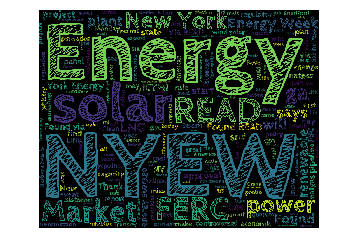

In [245]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# join tweets to a single string
words = ' '.join(user_data['text'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(
                      font_path='CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()

c:\anaconda3\lib\site-packages\wordcloud\wordcloud.py:370: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


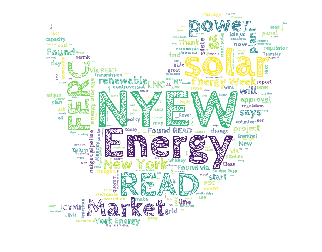

In [246]:
from scipy.misc import imread

twitter_mask = imread('twitter_mask.png', flatten=True)


wordcloud = WordCloud( font_path='CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=twitter_mask
            ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./my_twitter_wordcloud_2.png', dpi=100)
plt.show()